## Data import

In [1]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
data = np.load('/content/drive/MyDrive/Colab Notebooks/Duomenų folderis/flatland_train.npz') #Collab
#data = np.load('C:\\Users\\mazas\\Documents\\_AI_Primer\\flatland_train.npz') #PC
#data = np.load('/kaggle/input/flatland-train/flatland_train.npz') #Kaggle
X = data['X']
y = data['y']

y[y != 0] -= 2    # Correct labels so that triangle is mapped to class 1
X = X / 255

Mounted at /content/drive


In [2]:
from fltlnd_imports import *

## Train/Val/Test split

In [3]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, random_state=42)

## Augmentation using older keras

In [4]:
# Create an ImageDataGenerator with some augmentations
datagen = ImageDataGenerator(shear_range=20,
                             fill_mode = 'constant',
                             cval = 0,
                             rotation_range=90,
                             zoom_range=(0.7,1.3),
                             #brightness_range=(0.999999,0.99999999),
                             horizontal_flip = True,
                             vertical_flip = True
                             #rescale = 1./255
                             )

In [5]:
X_aug, y_aug = augment(X_train, y_train, datagen)

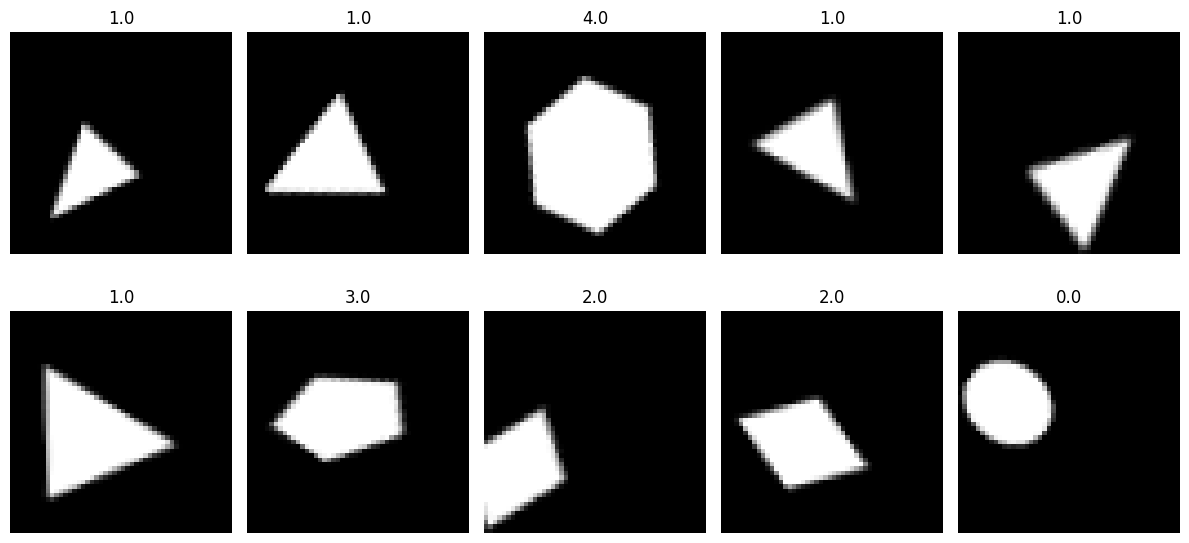

In [6]:
plot10(X_aug, y_aug,40)

## Data label encoding and mixup

In [7]:
# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=5)
y_val = to_categorical(y_val, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)
y_aug = to_categorical(y_aug, num_classes=5)

### Data mixup

In [8]:
X_mix, y_mix = mixup_data(X_aug, y_aug, 0.5, size = 0.4)

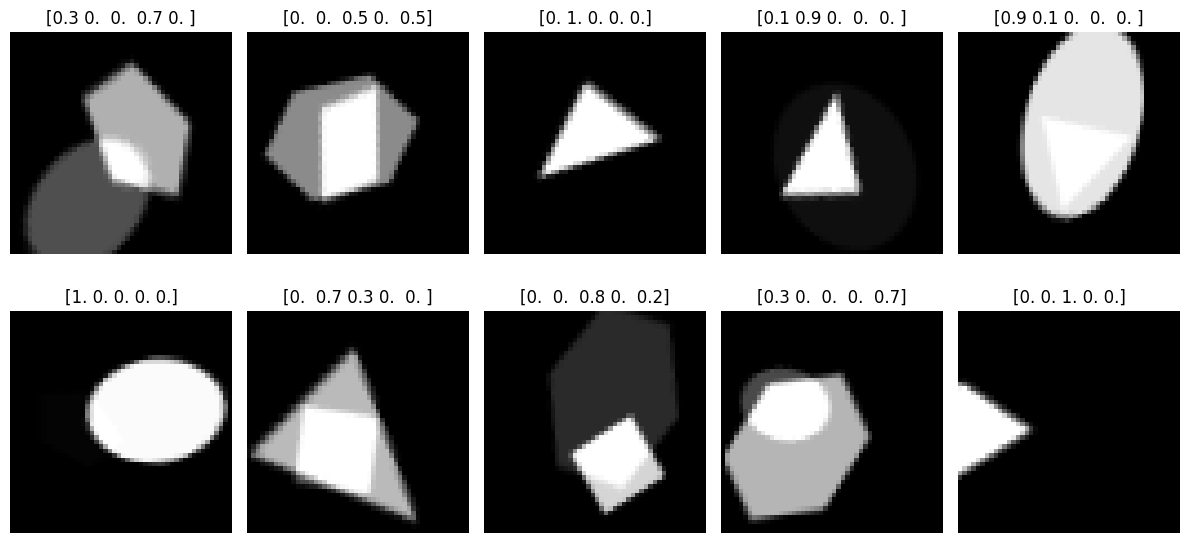

In [9]:
plot10(X_mix, np.round(y_mix,1),10)

In [10]:
#X_temp1, y_temp1 = merge_and_shuffle_for_one_hot(X_train, y_train, X_mix, y_mix)
X_train, y_train = merge_and_shuffle_for_one_hot(X_mix, y_mix, X_aug, y_aug)

(8400, 2500)


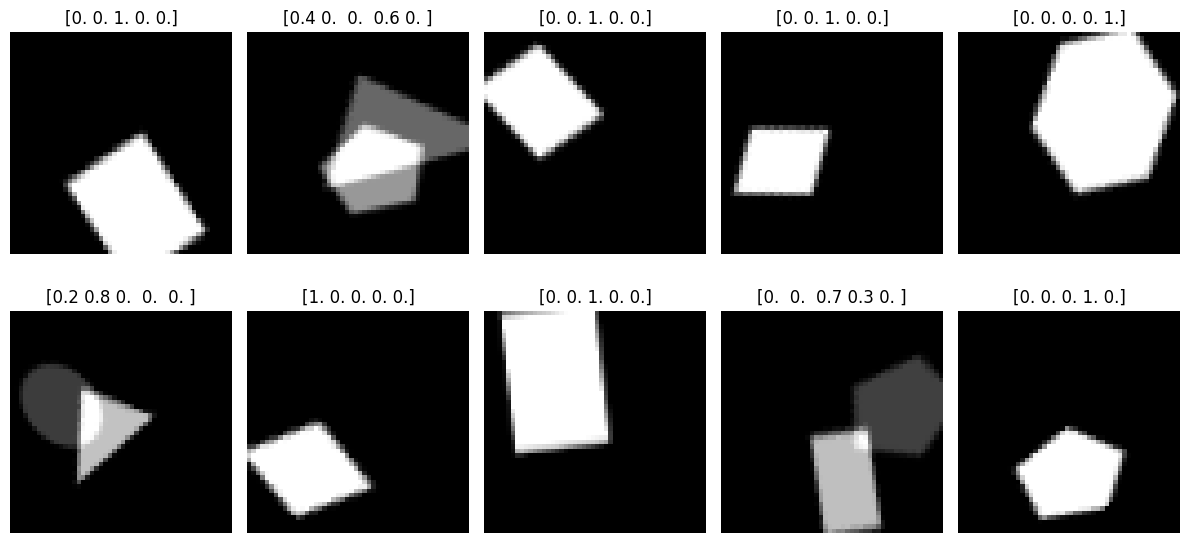

In [16]:
plot10(X_train, np.round(y_train,1),60)

## Model

In [17]:
model = Sequential([

    # Convolutional Block 1
    Conv2D(10, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', input_shape=(50, 50, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    # Convolutional Block 2
    Conv2D(10*2, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', input_shape=(50, 50, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    # Convolutional Block 3
    Conv2D(10*4, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', input_shape=(50, 50, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    # Convolutional Block 4
    Conv2D(10*8, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform', input_shape=(50, 50, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    # Fully Connected Layers
    Flatten(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=3e-4))


In [ ]:
#model.summary()

Train set accuracy: 0.96178573
Validation set accuracy: 0.988


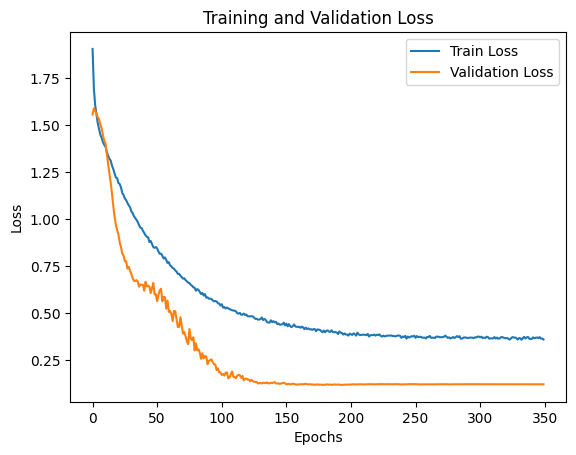

In [18]:
train_and_eval_pipe(model, X_train, y_train, X_val, y_val, epochs_number = 350)

In [19]:
test_set_accuracy(model, X_test, y_test)

Test set accuracy: 0.984


In [ ]:
#model.save('model115_2.h5')